In [1]:
import random
import os
import sys
import importlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from platform import python_version

sys.path.append(os.path.join('.','modules'))

#import multimerPatientTools
#import partitionTools
#import PlottingTools

In [2]:
python_version()

'3.7.6'

In [3]:
pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",None)
sns.set_context(context='talk',rc={"lines.linewidth": 2})

In [4]:
homeDir = '../..'
datDir = os.path.join(homeDir,'data')
datDir_birkir = os.path.join(datDir,'birkir_data')

In [ ]:
df = pd.read_csv(os.path.join(datDir_birkir,'MUT_all_data_bind_birkir.tsv'),sep='\t', low_memory = False)
df

In [5]:
#dfMaster = pd.read_csv('../../data/birkir_data/dfFeatureMerge_Master.tsv',sep='\t',low_memory=False)
dfMaster = pd.read_csv('../../data/birkir_data/MUT_all_data_bind_birkir.tsv',sep='\t',low_memory=False)
dfMaster.head()

,Sample,HLA_allele,Norm_peptide,Norm_MHCrank_EL,Mut_peptide,Mut_MHCrank_EL,Mut_MHCrank_BA,Gene_ID,Transcript_ID,Amino_Acid_Change,Allele_Frequency,Mismatches,peptide_position,Chr,Genomic_Position,Protein_position,Mutation_Consequence,Gene_Symbol,Cancer_Driver_Gene,Proteome_Peptide_Match,Expression_Level,Mutant_affinity_score,Normal_affinity_score,Expression_score,priority_Score,response,variant_allele_frequency,cellular_prevalence,Self_Similarity,n,est_freq,ID,pep_length,HLA_type,HLA_num,Peptide,cohort,pMHC.x,Patient,HLA,ID_pMHC,PeptMut,EL,BA,Expr,Target,PeptNorm,MutPos,PeptLen,MHC,Allele,Peptide_mut,Core,Of,Gp,Gl,Ip,Il,Score_EL_mut,X.Rank_EL_mut,Score_BA_mut,X.Rank_BA_mut,Aff.nM._mut,Peptide_wt,Score_EL_wt,X.Rank_EL_wt,Score_BA_wt,X.Rank_BA_wt,Aff.nM._wt,Pred,Thalf.h.,X.Rank_Stab,X.Rank_PRIME,Score_PRIME,Agrotopicity,Expr.EL_41,CoreNonAnchor,Loci,MeanHydroph,MeanHydroph_core,MeanHydroph_coreNoAnc,MeanHelix,MeanHelix_core,MeanHelix_coreNoAnc,peptComp,coreComp,coreNoAncComp,HydroPhobRatio,HydroPhobRatio_core,HydroPhobRatio_coreNoAnchor,Prop_Tiny,Prop_Small,Prop_Aliphatic,Prop_Aromatic,Prop_Non.polar,Prop_Polar,Prop_Charged,Prop_Basic,Prop_Acidic,Prop_Hydrophobic,Dataset,Partition,pMHC.y,pep_target
1,1849,HLA-A01:01,YRDQISKYA,7.4062,YTDQISKYA,0.2099,0.2605,ENSG00000143951,"ENST00000272321,ENST00000398544,ENST0000040912...",R/T,0.190,1,2,2,63378434,567408375375353984,M,WDPCP,No,No,2.226286,0.999870,1.822157e-12,0.981106,19,yes,0.344828,0.998627,0.966852,848.0,0.027696,1849,9,HLA-A,01:01,YTDQISKYA,bladder,YTDQISKYA_HLA-A01:01,BC-1849,A0101,BC-1849_A0101_YTDQISKYA,YTDQISKYA,0.2099,0.2605,2.226286,1,YRDQISKYA,[2],9,HLA-A01:01,HLA-A01:01,YTDQISKYA,YTDQISKYA,0,0,0,0,0,0.489199,0.304,0.466058,0.209,322.83,YRDQISKYA,0.002110,12.023,0.053932,21.239,27896.20,0.071,0.26,8.50,0.60,0.175676,0.009840,7.323308,QISKY,A,-0.966667,-0.966667,-1.000000,0.986667,0.986667,1.002000,"{A: 0.1111111111111111, R: 0.0, N: 0.0, D: 0.1...","{A: 0.1111111111111111, R: 0.0, N: 0.0, D: 0.1...","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....",0.111111,0.111111,0.200000,0.200000,0.200000,0.200000,0.200000,0.400000,0.600000,0.200000,0.200000,0.000000,0.200000,BC,0,YTDQISKYA_HLA-A01:01,YTDQISKYA_A0101
2,1849,HLA-A01:01,YLEQLHQLY,0.0224,QLEQLMQLY,0.0784,0.1517,ENSG00000115268,"ENST00000233609,ENST00000586096,ENST0000058965...",-/EQL,0.134,2,0.0430555555555556,19,1440019-1440020,330302030337,I,RPS15,No,No,487.712657,0.999933,9.999492e-01,1.000000,10,yes,0.613861,0.998751,0.927441,848.0,0.033804,1849,9,HLA-A,01:01,QLEQLMQLY,bladder,QLEQLMQLY_HLA-A01:01,BC-1849,A0101,BC-1849_A0101_QLEQLMQLY,QLEQLMQLY,0.0784,0.1517,487.712657,1,YLEQLHQLY,"[1, 6]",9,HLA-A01:01,HLA-A01:01,QLEQLMQLY,QLEQLMQLY,0,0,0,0,0,0.865564,0.072,0.492550,0.169,242.38,YLEQLHQLY,0.964747,0.019,0.686165,0.028,29.83,0.318,0.60,1.20,0.02,0.201746,6.035714,6773.786904,QLMQL,A,-0.222222,-0.222222,0.500000,1.260000,1.260000,1.322000,"{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....",0.444444,0.444444,0.600000,0.000000,0.000000,0.400000,0.000000,0.600000,0.400000,0.000000,0.000000,0.000000,0.600000,BC,2,QLEQLMQLY_HLA-A01:01,QLEQLMQLY_A0101
3,1849,HLA-A01:01,ILEYRDQISKY,0.2888,ILEYTDQISKY,0.2636,0.6203,ENSG00000143951,"ENST00000272321,ENST00000398544,ENST0000040912...",R/T,0.190,1,5,2,63378434,567408375375353984,M,WDPCP,No,No,2.226286,0.999830,9.998076e-01,0.981106,9,yes,0.344828,0.998627,0.950495,848.0,0.022040,1849,11,HLA-A,01:01,ILEYTDQISKY,bladder,ILEYTDQISKY_HLA-A01:01,BC-1849,A0101,BC-1849_A0101_ILEYTDQISKY,ILEYTDQISKY,0.2636,0.6203,2.226286,1,ILEYRDQISKY,[5],11,HLA-A01:01,HLA-A01:01,ILEYTDQISKY,ILEDQISKY,0,3,2,0,0,0.594209,0.220,0.292590,0.787,2109.11,ILEYRDQISKY,0.556056,0.244,0.262305,0.994,2926.89,0.303,0.58,1.30,0.20,0.187296,0.791751,10.119480,DQISKYT,A,-0.518182,-0.411111,-1.314286,1.027273,1.084444,0.981429,"{A: 0.0, R: 0.0, N: 0.0, D: 0.0909090909090909...","{A: 0.0, R: 0.0, N: 0.0, D: 0.11

In [6]:
dfMaster.sort_values('Score_EL_wt').head()

,Sample,HLA_allele,Norm_peptide,Norm_MHCrank_EL,Mut_peptide,Mut_MHCrank_EL,Mut_MHCrank_BA,Gene_ID,Transcript_ID,Amino_Acid_Change,Allele_Frequency,Mismatches,peptide_position,Chr,Genomic_Position,Protein_position,Mutation_Consequence,Gene_Symbol,Cancer_Driver_Gene,Proteome_Peptide_Match,Expression_Level,Mutant_affinity_score,Normal_affinity_score,Expression_score,priority_Score,response,variant_allele_frequency,cellular_prevalence,Self_Similarity,n,est_freq,ID,pep_length,HLA_type,HLA_num,Peptide,cohort,pMHC.x,Patient,HLA,ID_pMHC,PeptMut,EL,BA,Expr,Target,PeptNorm,MutPos,PeptLen,MHC,Allele,Peptide_mut,Core,Of,Gp,Gl,Ip,Il,Score_EL_mut,X.Rank_EL_mut,Score_BA_mut,X.Rank_BA_mut,Aff.nM._mut,Peptide_wt,Score_EL_wt,X.Rank_EL_wt,Score_BA_wt,X.Rank_BA_wt,Aff.nM._wt,Pred,Thalf.h.,X.Rank_Stab,X.Rank_PRIME,Score_PRIME,Agrotopicity,Expr.EL_41,CoreNonAnchor,Loci,MeanHydroph,MeanHydroph_core,MeanHydroph_coreNoAnc,MeanHelix,MeanHelix_core,MeanHelix_coreNoAnc,peptComp,coreComp,coreNoAncComp,HydroPhobRatio,HydroPhobRatio_core,HydroPhobRatio_coreNoAnchor,Prop_Tiny,Prop_Small,Prop_Aliphatic,Prop_Aromatic,Prop_Non.polar,Prop_Polar,Prop_Charged,Prop_Basic,Prop_Acidic,Prop_Hydrophobic,Dataset,Partition,pMHC.y,pep_target
14566,PATIEN19B,HLA-A24:02,VNWLLHHGGGD,97.5000,VNTYLHPGGGW,1.2410,2.7329,ENSG00000196917,ENST00000432564,-/X,0.02800,4,3:11,12,122729961-122729962,126,F,HCAR1,NO,NO,0.315856,0.978011,4.210997e-208,0.393434,1,0,0.688525,0.998509,0.819037,691.0,0.0,19,11,HLA-A,24:02,VNTYLHPGGGW,Basket,VNTYLHPGGGW_HLA-A24:02,RH-19,A2402,RH-19_A2402_VNTYLHPGGGW,VNTYLHPGGGW,1.2410,2.7329,0.315856,0,VNWLLHHGGGD,"[3, 4, 7, 11]",11,HLA-A24:02,HLA-A24:02,VNTYLHPGGGW,VYLHPGGGW,0,1,2,0,0,0.132368,1.057,0.221145,2.661,4568.95,VNWLLHHGGGD,0.000000,100.0,0.012605,72.149,43625.40,0.010,0.15,24.0,100.0,0.000000,0.036882,0.298823,HPGGGNT,A,-0.400000,-0.022222,-1.457143,0.823636,0.815556,0.734286,"{A: 0.0, R: 0.0, N: 0.09090909090909091, D: 0....","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....","{A: 0.0, R: 0.0, N: 0.14285714285714285, D: 0....",0.363636,0.444444,0.142857,0.571429,0.857143,0.000000,0.142857,0.571429,0.428571,0.142857,0.142857,0.0,0.142857,RH,2,VNTYLHPGGGW_HLA-A24:02,VNTYLHPGGGW_A2402
16731,PATIEN33B,HLA-B40:01,PCRGCSSYLM,73.3333,QERGCSSWLM,1.8758,1.0754,ENSG00000070785,"ENST00000360403,ENST00000372183,ENST00000620860",K/X,0.05000,3,1:10,1,44941510,"150,150,150",F,EIF2B3,NO,NO,8.460977,0.650446,1.263884e-155,1.000000,3,0,NaN,NaN,0.881862,NaN,0.0,33,10,HLA-B,40:01,QERGCSSWLM,Basket,QERGCSSWLM_HLA-B40:01,RH-33,B4001,RH-33_B4001_QERGCSSWLM,QERGCSSWLM,1.8758,1.0754,8.460977,0,PCRGCSSYLM,"[1, 2, 8]",10,HLA-B40:01,HLA-B40:01,QERGCSSWLM,QERGSSWLM,0,4,1,0,0,0.111005,1.255,0.384911,0.832,776.76,PCRGCSSYLM,0.000001,85.0,0.023897,45.080,38608.13,0.336,0.64,1.5,2.0,0.166439,0.018456,6.741814,GSSWLC,B,-0.620000,-0.966667,0.566667,1.074000,1.070000,0.933333,"{A: 0.0, R: 0.1, N: 0.0, D: 0.0, C: 0.1, Q: 0....","{A: 0.0, R: 0.1111111111111111, N: 0.0, D: 0.0...","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.16666666...",0.400000,0.333333,0.500000,0.666667,0.666667,0.166667,0.166667,0.666667,0.333333,0.000000,0.000000,0.0,0.500000,RH,3,QERGCSSWLM_HLA-B40:01,QERGCSSWLM_B4001
14616,PATIEN21A,HLA-A03:01,PRQWRCRLRG,91.2500,SRQWPCRLRK,1.5974,0.4039,ENSG00000119669,ENST00000238647,PVGVKTVALSAKEAAAAAAAAAAAAAAA/X,0.07300,3,1:10,14,77027488-77027569,75,F,IRF2BPL,NO,NO,3.988041,0.882155,1.570679e-194,0.999438,6,0,0.340000,0.997056,0.884864,517.0,0.0,21,10,HLA-A,03:01,SRQWPCRLRK,Basket,SRQWPCRLRK_HLA-A03:01,RH-21,A0301,RH-21_A0301_SRQWPCRLRK,SRQWPCRLRK,1.5974,0.4039,3.988041,0,PRQWRCRLRG,"[1, 5, 10]",10,HLA-A03:01,HLA-A03:01,SRQWPCRLRK,SQWPCRLRK,0,1,1,0,0,0.341337,0.759,0.553899,0.451,124.80,PRQWRCRLRG,0.000001,95.0,0.046591,35.732,30202.32,0.114,0.32,5.5,100.0,0.000000,0.012622,5.254336,PCRLRR,A,-1.790000,-1.488889,-1.466667,1.012000,1.017778,0.968333,"{A: 0.0, R: 0.3, N: 0.0, D: 0.0, C: 0.1, Q: 0....","{A: 0.0, R: 0.2222222222222222, N: 0.0, D: 0.0...","{A: 0.0, R: 0.5, N: 0.0, D: 0

In [7]:
dfMaster['MutType'] = dfMaster.apply(lambda row: 'Improved' if row['Score_EL_mut']/(row['Score_EL_wt']+0.000001)>1.2 else 'Conserved',axis=1)

SyntaxError: invalid syntax (<ipython-input-8-9333bbdb2174>, line 8)

### Plot Mutpos in core

/Users/annieborch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/annieborch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


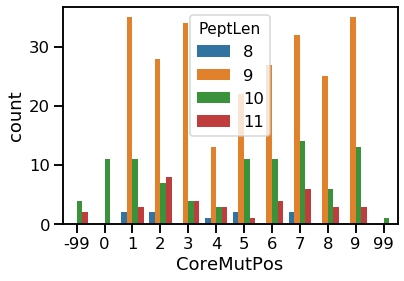

In [9]:
dfMaster.head()
#dfMaster.groupby('PeptLen').apply(len)
dfMaster.head()
dfMaster['MutPoss'] = dfMaster['MutPos'].apply(lambda mut: eval(mut))
dfMaster['NumMut'] = dfMaster['MutPoss'].apply(len)

dfMaster_1mut = dfMaster[dfMaster['NumMut']==1]
dfMaster_1mut['MutPosition'] = dfMaster_1mut['MutPoss'].apply(lambda mut: mut[0])

def coreMutPos(mutPos,Of,Gp,Gl,Ip,Il):
    
    mutPos = int(mutPos)
    Gp = int(Gp)-1
    Gl = int(Gl)
    Ip = int(Ip)-1
    Il = int(Il)
    Of = int(Of)
    if mutPos>Gp:
        mutPos-=Gl
    elif mutPos==Gp or (mutPos>Gp and mutPos<=Gp+Gl):
        return 0
    if mutPos>Ip:
        mutPos+=Il
    mutPos-=Of
    if mutPos<=0:
        return -99
    elif mutPos>9:
        return 99
    else:
        return mutPos

dfMaster_1mut['CoreMutPos'] = dfMaster_1mut.apply(lambda row: coreMutPos(row['MutPosition'],row['Of'],row['Gp'],row['Gl'],row['Ip'],row['Il']),axis=1)
sns.countplot(data= dfMaster_1mut[dfMaster_1mut['Target']==1.0], x='CoreMutPos',hue='PeptLen')

#dfMaster_1mut.groupby('Of').apply(len)
#dfMaster_1mut[dfMaster_1mut.apply(lambda row: row['MutPosition']==row['Gp'], axis=1)]

In [10]:
len(dfMaster[dfMaster['NumMut']>1])#.head()

2771

In [11]:
print(len(dfMaster),len(dfMaster_1mut))

17520 14245


In [13]:
dfMaster_1mut_core = dfMaster_1mut[dfMaster_1mut['CoreMutPos'].apply(lambda pos: pos>=0 and pos<=9)]

In [14]:
dfMaster_1mut_core.to_csv(os.path.join(datDir_birkir,'dfMaster_1mut_core.csv'),index=False,header=True,sep='\t')


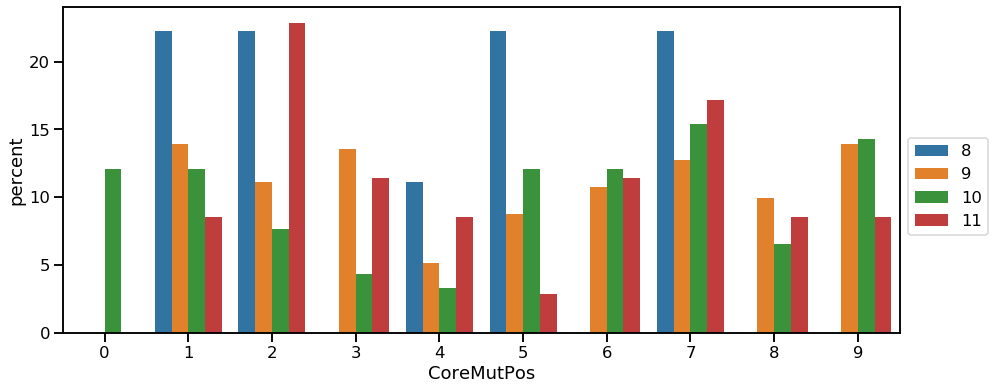

In [15]:
dfMaster_1mut_core_pos = dfMaster_1mut_core[dfMaster_1mut_core['Target']==1.0]
dfMaster_1mut_core_neg = dfMaster_1mut_core[dfMaster_1mut_core['Target']==0.0]

dfMaster_1mut_core_pos_frac = dfMaster_1mut_core_pos.groupby('PeptLen')['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
dfMaster_1mut_core_neg_frac = dfMaster_1mut_core_neg.groupby('PeptLen')['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()


y,x = 'CoreMutPos', 'PeptLen'

plt.figure(figsize=(15,6))
sns.barplot(data=dfMaster_1mut_core_pos_frac,hue='PeptLen',y='percent',x='CoreMutPos')
plt.legend(loc=(1.01,0.3))
#plt.savefig('MutationPositionProb.png',dpi=300)
plt.show()

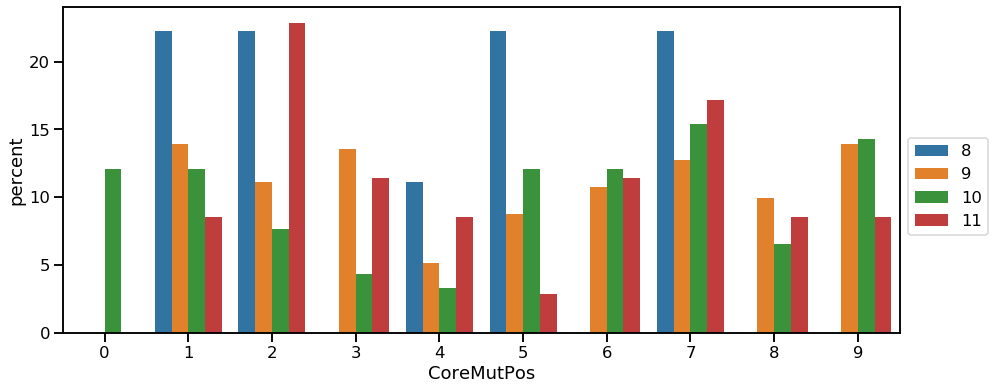

In [16]:
dfMaster_1mut_core_Target_frac = dfMaster_1mut_core.groupby(['Target','PeptLen'])['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

y,x = 'CoreMutPos', 'PeptLen'

plt.figure(figsize=(15,6))
sns.barplot(data=dfMaster_1mut_core_Target_frac[dfMaster_1mut_core_Target_frac['Target']==1.0],hue='PeptLen',y='percent',x='CoreMutPos')
plt.legend(loc=(1.01,0.3))
#plt.savefig('MutationPositionProb.png',dpi=300)
plt.show()

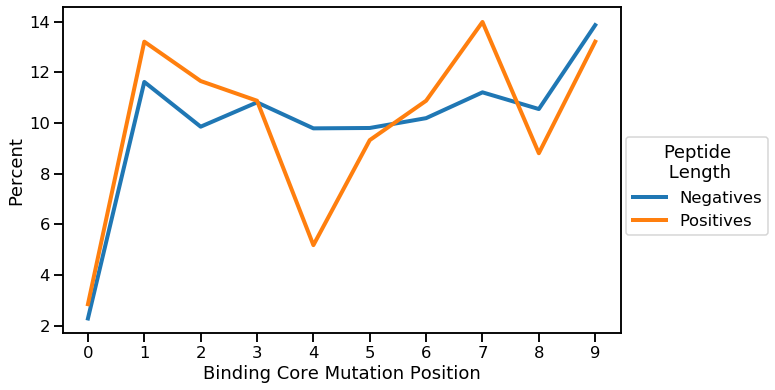

In [19]:
plt.figure(figsize=(10,6))

dfMaster_1mut_core_Target_frac = dfMaster_1mut_core.groupby(['Target','PeptLen'])['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
dfMaster_1mut_core_Target_frac = dfMaster_1mut_core.groupby(['Target'])['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
for target, dfG in dfMaster_1mut_core_Target_frac.groupby('Target'):
    label = 'Positives' if target==1.0 else 'Negatives'
    sns.lineplot(data=dfG,y='percent',x='CoreMutPos',linewidth=4.0,label=label)
    #sns.lineplot(data=dfMaster_1mut_core_neg_frac,y='percent',x='CoreMutPos',linewidth=4.0,label='Negatives')
#plt.linewidth(2.0)
plt.ylabel('Percent')
plt.xlabel('Binding Core Mutation Position')
plt.legend(title='Peptide\n Length',loc=(1.01,0.3))
plt.xticks(range(10))
#plt.savefig(os.path.join(figDir,"MutationPosition_linePlot.png"),dpi=600)
plt.show()

In [20]:
dfMaster_1mut_core_MutType_frac.head

NameError: name 'dfMaster_1mut_core_MutType_frac' is not defined

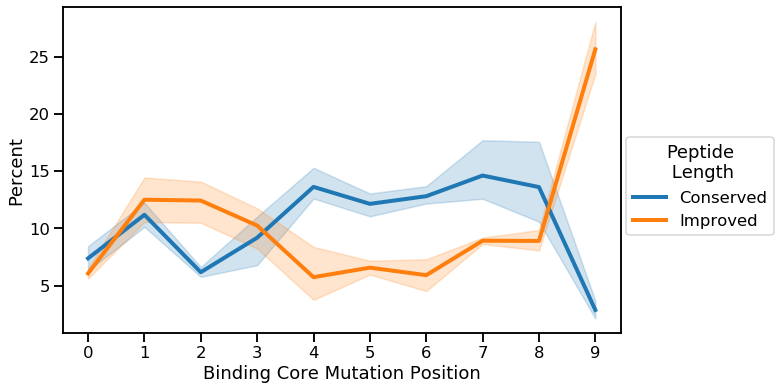

In [21]:
plt.figure(figsize=(10,6))
dfMaster_1mut_core_MutType_frac = dfMaster_1mut_core.groupby(['MutType','PeptLen'])['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
#dfMaster_1mut_core_MutType_frac = dfMaster_1mut_core_pos.groupby(['MutType'])['CoreMutPos'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

#sns.lineplot(data=dfOut_core,hue='PeptLen',y='percent',x='CoreMutPos',linewidth=4.0)
for mutType, dfG in dfMaster_1mut_core_MutType_frac.groupby('MutType'):

    sns.lineplot(data=dfG,y='percent',x='CoreMutPos',linewidth=4.0,label=mutType)
   # sns.lineplot(data=dfMaster_1mut_core_neg_frac,y='percent',x='CoreMutPos',linewidth=4.0,label='Negatives')
#plt.linewidth(2.0)
plt.ylabel('Percent')
plt.xlabel('Binding Core Mutation Position')
plt.legend(title='Peptide\n Length',loc=(1.01,0.3))
plt.xticks(range(10))
#plt.savefig(os.path.join(figDir,"MutationPosition_linePlot.png"),dpi=600)
plt.show()

In [22]:
dfMaster_1mut_core_MutType_frac.to_csv(os.path.join(datDir_birkir,'dfMaster_1mut_core_MutType_frac.csv'),index=False,header=True,sep='\t')

In [23]:
dfMaster.sort_values('Score_EL_wt').head()

,Sample,HLA_allele,Norm_peptide,Norm_MHCrank_EL,Mut_peptide,Mut_MHCrank_EL,Mut_MHCrank_BA,Gene_ID,Transcript_ID,Amino_Acid_Change,Allele_Frequency,Mismatches,peptide_position,Chr,Genomic_Position,Protein_position,Mutation_Consequence,Gene_Symbol,Cancer_Driver_Gene,Proteome_Peptide_Match,Expression_Level,Mutant_affinity_score,Normal_affinity_score,Expression_score,priority_Score,response,variant_allele_frequency,cellular_prevalence,Self_Similarity,n,est_freq,ID,pep_length,HLA_type,HLA_num,Peptide,cohort,pMHC.x,Patient,HLA,ID_pMHC,PeptMut,EL,BA,Expr,Target,PeptNorm,MutPos,PeptLen,MHC,Allele,Peptide_mut,Core,Of,Gp,Gl,Ip,Il,Score_EL_mut,X.Rank_EL_mut,Score_BA_mut,X.Rank_BA_mut,Aff.nM._mut,Peptide_wt,Score_EL_wt,X.Rank_EL_wt,Score_BA_wt,X.Rank_BA_wt,Aff.nM._wt,Pred,Thalf.h.,X.Rank_Stab,X.Rank_PRIME,Score_PRIME,Agrotopicity,Expr.EL_41,CoreNonAnchor,Loci,MeanHydroph,MeanHydroph_core,MeanHydroph_coreNoAnc,MeanHelix,MeanHelix_core,MeanHelix_coreNoAnc,peptComp,coreComp,coreNoAncComp,HydroPhobRatio,HydroPhobRatio_core,HydroPhobRatio_coreNoAnchor,Prop_Tiny,Prop_Small,Prop_Aliphatic,Prop_Aromatic,Prop_Non.polar,Prop_Polar,Prop_Charged,Prop_Basic,Prop_Acidic,Prop_Hydrophobic,Dataset,Partition,pMHC.y,pep_target,MutType,MutPoss,NumMut
14566,PATIEN19B,HLA-A24:02,VNWLLHHGGGD,97.5000,VNTYLHPGGGW,1.2410,2.7329,ENSG00000196917,ENST00000432564,-/X,0.02800,4,3:11,12,122729961-122729962,126,F,HCAR1,NO,NO,0.315856,0.978011,4.210997e-208,0.393434,1,0,0.688525,0.998509,0.819037,691.0,0.0,19,11,HLA-A,24:02,VNTYLHPGGGW,Basket,VNTYLHPGGGW_HLA-A24:02,RH-19,A2402,RH-19_A2402_VNTYLHPGGGW,VNTYLHPGGGW,1.2410,2.7329,0.315856,0,VNWLLHHGGGD,"[3, 4, 7, 11]",11,HLA-A24:02,HLA-A24:02,VNTYLHPGGGW,VYLHPGGGW,0,1,2,0,0,0.132368,1.057,0.221145,2.661,4568.95,VNWLLHHGGGD,0.000000,100.0,0.012605,72.149,43625.40,0.010,0.15,24.0,100.0,0.000000,0.036882,0.298823,HPGGGNT,A,-0.400000,-0.022222,-1.457143,0.823636,0.815556,0.734286,"{A: 0.0, R: 0.0, N: 0.09090909090909091, D: 0....","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....","{A: 0.0, R: 0.0, N: 0.14285714285714285, D: 0....",0.363636,0.444444,0.142857,0.571429,0.857143,0.000000,0.142857,0.571429,0.428571,0.142857,0.142857,0.0,0.142857,RH,2,VNTYLHPGGGW_HLA-A24:02,VNTYLHPGGGW_A2402,Improved,"[3, 4, 7, 11]",4
16731,PATIEN33B,HLA-B40:01,PCRGCSSYLM,73.3333,QERGCSSWLM,1.8758,1.0754,ENSG00000070785,"ENST00000360403,ENST00000372183,ENST00000620860",K/X,0.05000,3,1:10,1,44941510,"150,150,150",F,EIF2B3,NO,NO,8.460977,0.650446,1.263884e-155,1.000000,3,0,NaN,NaN,0.881862,NaN,0.0,33,10,HLA-B,40:01,QERGCSSWLM,Basket,QERGCSSWLM_HLA-B40:01,RH-33,B4001,RH-33_B4001_QERGCSSWLM,QERGCSSWLM,1.8758,1.0754,8.460977,0,PCRGCSSYLM,"[1, 2, 8]",10,HLA-B40:01,HLA-B40:01,QERGCSSWLM,QERGSSWLM,0,4,1,0,0,0.111005,1.255,0.384911,0.832,776.76,PCRGCSSYLM,0.000001,85.0,0.023897,45.080,38608.13,0.336,0.64,1.5,2.0,0.166439,0.018456,6.741814,GSSWLC,B,-0.620000,-0.966667,0.566667,1.074000,1.070000,0.933333,"{A: 0.0, R: 0.1, N: 0.0, D: 0.0, C: 0.1, Q: 0....","{A: 0.0, R: 0.1111111111111111, N: 0.0, D: 0.0...","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.16666666...",0.400000,0.333333,0.500000,0.666667,0.666667,0.166667,0.166667,0.666667,0.333333,0.000000,0.000000,0.0,0.500000,RH,3,QERGCSSWLM_HLA-B40:01,QERGCSSWLM_B4001,Improved,"[1, 2, 8]",3
14616,PATIEN21A,HLA-A03:01,PRQWRCRLRG,91.2500,SRQWPCRLRK,1.5974,0.4039,ENSG00000119669,ENST00000238647,PVGVKTVALSAKEAAAAAAAAAAAAAAA/X,0.07300,3,1:10,14,77027488-77027569,75,F,IRF2BPL,NO,NO,3.988041,0.882155,1.570679e-194,0.999438,6,0,0.340000,0.997056,0.884864,517.0,0.0,21,10,HLA-A,03:01,SRQWPCRLRK,Basket,SRQWPCRLRK_HLA-A03:01,RH-21,A0301,RH-21_A0301_SRQWPCRLRK,SRQWPCRLRK,1.5974,0.4039,3.988041,0,PRQWRCRLRG,"[1, 5, 10]",10,HLA-A03:01,HLA-A03:01,SRQWPCRLRK,SQWPCRLRK,0,1,1,0,0,0.341337,0.759,0.553899,0.451,124.80,PRQWRCRLRG,0.000001,95.0,0.046591,35.732,30202.32,0.114,0.32,5.5,100.0,0.000000,0.012622,5.254336,PCRLRR,A,-1.790000,-1.488889,-1.466667,1.012000,1.017778,0.968333,"{A: 0.0, R: 0.3, N: 0.0, D: 0.0, C: 0.1, Q: 0....","{A: 0.0,

In [24]:
figDir = os.path.join(homeDir,'fig')

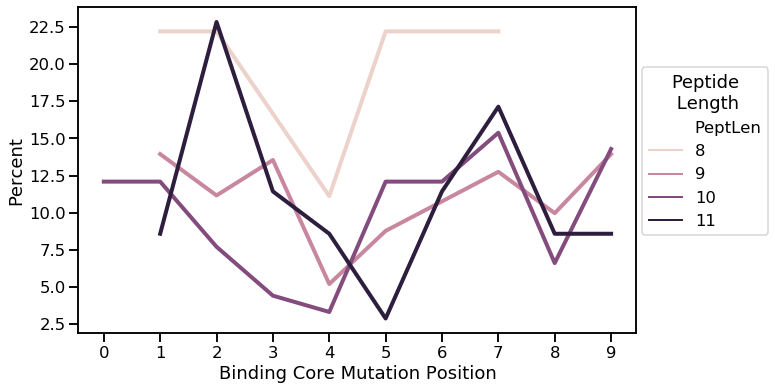

In [25]:
plt.figure(figsize=(10,6))
#sns.lineplot(data=dfOut_core,hue='PeptLen',y='percent',x='CoreMutPos',linewidth=4.0)
sns.lineplot(data=dfMaster_1mut_core_pos_frac,hue='PeptLen',y='percent',x='CoreMutPos',linewidth=4.0)
#sns.lineplot(data=dfMaster_1mut_neg_frac_core,y='percent',x='CoreMutPos',linewidth=4.0)
#plt.linewidth(2.0)
plt.ylabel('Percent')
plt.xlabel('Binding Core Mutation Position')
plt.legend(title='Peptide\n Length',loc=(1.01,0.3))
plt.xticks(range(10))
plt.savefig(os.path.join(figDir,"MutationPosition_linePlot.png"),dpi=600)
plt.show()

In [26]:
dfMaster_1mut_core_neg_frac.head

<bound method NDFrame.head of     PeptLen  CoreMutPos    percent
0         8           9  18.004338
1         8           1  13.665944
2         8           8  13.449024
3         8           7  13.015184
4         8           4  11.062907
5         8           5   8.242950
6         8           2   8.026030
7         8           6   7.809111
8         8           3   6.724512
9         9           9  13.634745
10        9           1  11.866619
11        9           7  11.486887
12        9           3  10.964756
13        9           6  10.739290
14        9           8  10.632491
15        9           2  10.300225
16        9           4  10.229026
17        9           5  10.145959
18       10           9  13.957447
19       10           3  11.092199
20       10           1  10.865248
21       10           7  10.496454
22       10           8  10.127660
23       10           6   9.673759
24       10           5   9.304965
25       10           2   9.248227
26       10           4  

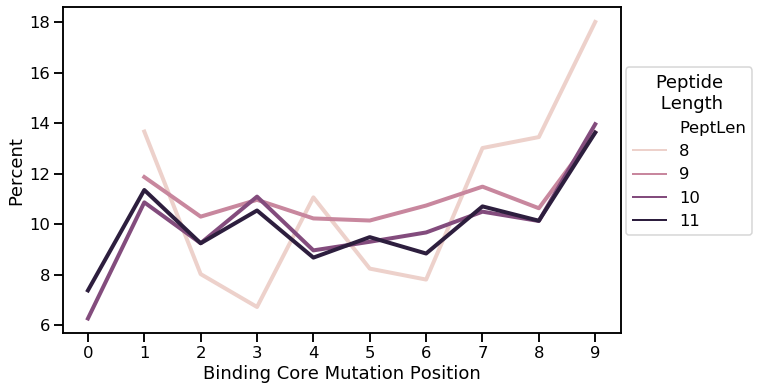

In [27]:
plt.figure(figsize=(10,6))
#sns.lineplot(data=dfOut_core,hue='PeptLen',y='percent',x='CoreMutPos',linewidth=4.0)
sns.lineplot(data=dfMaster_1mut_core_neg_frac,hue='PeptLen',y='percent',x='CoreMutPos',linewidth=4.0)
#sns.lineplot(data=dfMaster_1mut_neg_frac_core,y='percent',x='CoreMutPos',linewidth=4.0)
#plt.linewidth(2.0)
plt.ylabel('Percent')
plt.xlabel('Binding Core Mutation Position')
plt.legend(title='Peptide\n Length',loc=(1.01,0.3))
plt.xticks(range(10))
#plt.savefig(os.path.join(figDir,"MutationPosition_linePlot.png"),dpi=600)
plt.show()

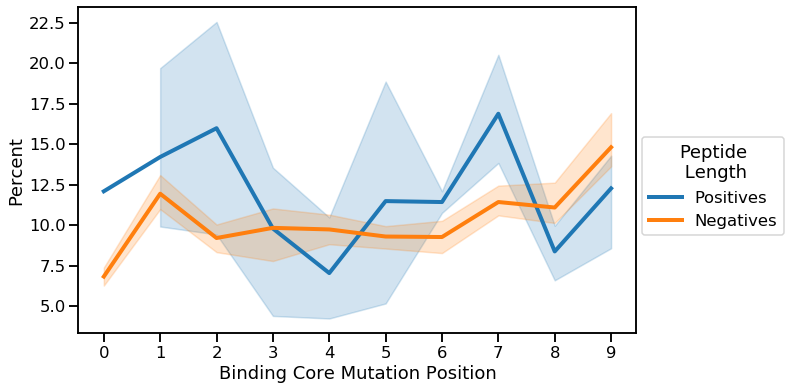

In [28]:
plt.figure(figsize=(10,6))
#sns.lineplot(data=dfOut_core,hue='PeptLen',y='percent',x='CoreMutPos',linewidth=4.0)
sns.lineplot(data=dfMaster_1mut_core_pos_frac,y='percent',x='CoreMutPos',linewidth=4.0,label='Positives')
sns.lineplot(data=dfMaster_1mut_core_neg_frac,y='percent',x='CoreMutPos',linewidth=4.0,label='Negatives')
#plt.linewidth(2.0)
plt.ylabel('Percent')
plt.xlabel('Binding Core Mutation Position')
plt.legend(title='Peptide\n Length',loc=(1.01,0.3))
plt.xticks(range(10))
#plt.savefig(os.path.join(figDir,"MutationPosition_linePlot.png"),dpi=600)
plt.show()

In [29]:
dfMaster_1mut_core_pos_frac.to_csv(os.path.join(datDir_birkir,'dfMaster_1mut_core_pos_frac.csv'),index=False,header=True,sep='\t')
dfMaster_1mut_core_neg_frac.to_csv(os.path.join(datDir_birkir,'dfMaster_1mut_core_neg_frac.csv'),index=False,header=True,sep='\t')


In [31]:
dfMaster_1mut_pos_mutIns = dfMaster_1mut_pos[dfMaster_1mut_pos['CoreMutPos']==0]
dfMaster_1mut_pos_mutIns
dfMaster_1mut_pos_mutIns['Gp'] = dfMaster_1mut_pos_mutIns['Gp'].apply(int)
sns.countplot(data=dfMaster_1mut_pos_mutIns,x='Gp')

#sns.lineplot(data=dfOut_core_mutIns,hue='PeptLen',y='percent',x='Gp',linewidth=3.0)

NameError: name 'dfMaster_1mut_pos' is not defined

In [32]:
dfOut_Gp = dfMaster_1mut_pos.groupby('PeptLen')['Gp'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

sns.barplot(data=dfOut_Gp,hue='PeptLen',y='percent',x='Gp')
plt.legend(loc=(1.01,0.3))
#plt.savefig('MutationPositionProb.png',dpi=300)
plt.show()

NameError: name 'dfMaster_1mut_pos' is not defined

In [33]:
for (l,dfG) in dfOut.groupby('PeptLen'):
    sns.barplot(data=dfG,y='percent',x='CoreMutPos')
    plt.show()

NameError: name 'dfOut' is not defined

In [34]:
dfMaster_1mut.head()

,Sample,HLA_allele,Norm_peptide,Norm_MHCrank_EL,Mut_peptide,Mut_MHCrank_EL,Mut_MHCrank_BA,Gene_ID,Transcript_ID,Amino_Acid_Change,Allele_Frequency,Mismatches,peptide_position,Chr,Genomic_Position,Protein_position,Mutation_Consequence,Gene_Symbol,Cancer_Driver_Gene,Proteome_Peptide_Match,Expression_Level,Mutant_affinity_score,Normal_affinity_score,Expression_score,priority_Score,response,variant_allele_frequency,cellular_prevalence,Self_Similarity,n,est_freq,ID,pep_length,HLA_type,HLA_num,Peptide,cohort,pMHC.x,Patient,HLA,ID_pMHC,PeptMut,EL,BA,Expr,Target,PeptNorm,MutPos,PeptLen,MHC,Allele,Peptide_mut,Core,Of,Gp,Gl,Ip,Il,Score_EL_mut,X.Rank_EL_mut,Score_BA_mut,X.Rank_BA_mut,Aff.nM._mut,Peptide_wt,Score_EL_wt,X.Rank_EL_wt,Score_BA_wt,X.Rank_BA_wt,Aff.nM._wt,Pred,Thalf.h.,X.Rank_Stab,X.Rank_PRIME,Score_PRIME,Agrotopicity,Expr.EL_41,CoreNonAnchor,Loci,MeanHydroph,MeanHydroph_core,MeanHydroph_coreNoAnc,MeanHelix,MeanHelix_core,MeanHelix_coreNoAnc,peptComp,coreComp,coreNoAncComp,HydroPhobRatio,HydroPhobRatio_core,HydroPhobRatio_coreNoAnchor,Prop_Tiny,Prop_Small,Prop_Aliphatic,Prop_Aromatic,Prop_Non.polar,Prop_Polar,Prop_Charged,Prop_Basic,Prop_Acidic,Prop_Hydrophobic,Dataset,Partition,pMHC.y,pep_target,MutType,MutPoss,NumMut,MutPosition,CoreMutPos
1,1849,HLA-A01:01,YRDQISKYA,7.4062,YTDQISKYA,0.2099,0.2605,ENSG00000143951,"ENST00000272321,ENST00000398544,ENST0000040912...",R/T,0.190,1,2,2,63378434,567408375375353984,M,WDPCP,No,No,2.226286,0.999870,1.822157e-12,0.981106,19,yes,0.344828,0.998627,0.966852,848.0,0.027696,1849,9,HLA-A,01:01,YTDQISKYA,bladder,YTDQISKYA_HLA-A01:01,BC-1849,A0101,BC-1849_A0101_YTDQISKYA,YTDQISKYA,0.2099,0.2605,2.226286,1,YRDQISKYA,[2],9,HLA-A01:01,HLA-A01:01,YTDQISKYA,YTDQISKYA,0,0,0,0,0,0.489199,0.304,0.466058,0.209,322.83,YRDQISKYA,0.002110,12.023,0.053932,21.239,27896.20,0.071,0.26,8.50,0.60,0.175676,0.009840,7.323308,QISKY,A,-0.966667,-0.966667,-1.000000,0.986667,0.986667,1.002000,"{A: 0.1111111111111111, R: 0.0, N: 0.0, D: 0.1...","{A: 0.1111111111111111, R: 0.0, N: 0.0, D: 0.1...","{A: 0.0, R: 0.0, N: 0.0, D: 0.0, C: 0.0, Q: 0....",0.111111,0.111111,0.200000,0.200000,0.200000,0.200000,0.200000,0.400000,0.600000,0.200000,0.200000,0.000000,0.200000,BC,0,YTDQISKYA_HLA-A01:01,YTDQISKYA_A0101,Improved,[2],1,2,2
3,1849,HLA-A01:01,ILEYRDQISKY,0.2888,ILEYTDQISKY,0.2636,0.6203,ENSG00000143951,"ENST00000272321,ENST00000398544,ENST0000040912...",R/T,0.190,1,5,2,63378434,567408375375353984,M,WDPCP,No,No,2.226286,0.999830,9.998076e-01,0.981106,9,yes,0.344828,0.998627,0.950495,848.0,0.022040,1849,11,HLA-A,01:01,ILEYTDQISKY,bladder,ILEYTDQISKY_HLA-A01:01,BC-1849,A0101,BC-1849_A0101_ILEYTDQISKY,ILEYTDQISKY,0.2636,0.6203,2.226286,1,ILEYRDQISKY,[5],11,HLA-A01:01,HLA-A01:01,ILEYTDQISKY,ILEDQISKY,0,3,2,0,0,0.594209,0.220,0.292590,0.787,2109.11,ILEYRDQISKY,0.556056,0.244,0.262305,0.994,2926.89,0.303,0.58,1.30,0.20,0.187296,0.791751,10.119480,DQISKYT,A,-0.518182,-0.411111,-1.314286,1.027273,1.084444,0.981429,"{A: 0.0, R: 0.0, N: 0.0, D: 0.0909090909090909...","{A: 0.0, R: 0.0, N: 0.0, D: 0.1111111111111111...","{A: 0.0, R: 0.0, N: 0.0, D: 0.1428571428571428...",0.272727,0.333333,0.142857,0.285714,0.428571,0.142857,0.142857,0.285714,0.714286,0.285714,0.142857,0.142857,0.142857,BC,0,ILEYTDQISKY_HLA-A01:01,ILEYTDQISKY_A0101,Conserved,[5],1,5,3
4,2389,HLA-A01:01,CIDFQPEIY,0.0699,CIDFQPDIY,0.0602,0.0279,ENSG00000198198,"ENST00000372450,ENST00000406439,ENST0000056295...",E/D,0.059,1,7,1,43404496,146148148148,M,SZT2,No,No,72.998996,0.999939,9.999356e-01,1.000000,3,yes,0.646840,0.999725,0.967480,785.0,0.014098,2389,9,HLA-A,01:01,CIDFQPDIY,bladder,CIDFQPDIY_HLA-A01:01,BC-2389,A0101,BC-2389_A0101_CIDFQPDIY,CIDFQPDIY,0.0602,0.0279,72.998996,1,CIDFQPEIY,[7],9,HLA-A01:01,HLA-A01:01,CIDFQPDIY,CIDFQPDIY,0,0,0,0,0,0.870248,0.071,0.700090,0.022,25.66,CIDFQPEIY,0.890313,0.059,0.678234,0.031,32.51,0.592,1.32,0.25,0.03,0.199159,0.709677,1028.154874,FQPDI,A,0.100000,0.100000,-0.260000,0.967778,0.967778,0.974000,"{A: 0.0, R: 0.0, N: 0.0, D: 0.222

In [35]:
dfMaster_1mut_lenMut = dfMaster_1mut[['PeptLen','CoreMutPos','Partition','Target']]#.head()
dfMaster_1mut_lenMut = dfMaster_1mut_lenMut[dfMaster_1mut_lenMut['CoreMutPos'].apply(lambda pos: pos>=0 and pos <=9)]

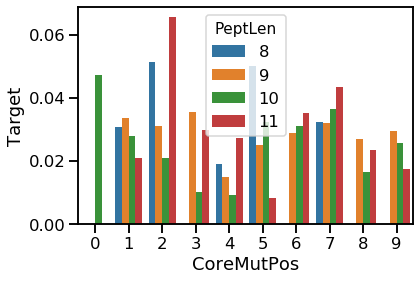

In [36]:
sns.barplot(data=dfMaster_1mut_lenMut.groupby(['PeptLen','CoreMutPos'])['Target'].apply(np.mean).reset_index(),hue='PeptLen',x='CoreMutPos',y='Target')

In [37]:
dfMaster_1mut_lenMut.head()

,PeptLen,CoreMutPos,Partition,Target
1,9,2,0,1
3,11,3,0,1
4,9,7,0,1
5,10,7,0,1
6,10,7,0,1


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def getOneHotArray(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    #print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    return onehot_encoder.fit_transform(integer_encoded)


oneHot_peptLen = getOneHotArray(dfMaster_1mut_lenMut['PeptLen'].values)
oneHot_mutPos = getOneHotArray(dfMaster_1mut_lenMut['CoreMutPos'].values)

#dfMaster_1mut_lenMut['Partition'].values,dfMaster_1mut_lenMut['Target'].values

oneHot_peptLen_mutPos = np.concatenate([oneHot_peptLen,oneHot_mutPos],axis=1)
columns = ["l{}".format(l) for l in range(8,12)]+["m{}".format(m) for m in range(0,10)]
dfLM = pd.DataFrame(oneHot_peptLen_mutPos,columns=columns)#.head()
dfLM['Partition'] = dfMaster_1mut_lenMut['Partition']
dfLM['Target'] = dfMaster_1mut_lenMut['Target']

dfLM = dfLM[dfLM['Target'].notna()]
dfLM['Target'] = dfLM['Target'].apply(float)

In [ ]:
columns

In [ ]:
import modelTrainEval
importlib.reload(modelTrainEval)
dfEval = modelTrainEval.runCrossValidationTraining(dfLM,columns,featureDict=False,targCol='Target',folds=5,outCol='classPred',modelType='RF')[0]

In [ ]:
dfEval
import NNanalysis
NNanalysis.getAUC_EL_plotROC(dfEval['Target'],dfEval['classPred'])

In [ ]:
dfMaster_1mut.sort_values('CoreMutPos',ascending=True).head(n=10)

In [ ]:
dfMaster_1mut.sort_values('CoreMutPos',ascending=False).head(n=10)

In [ ]:
dfMaster_1mut.sort_values('Gp',ascending=False).head()

In [ ]:
dfMaster.head()

### Fix NA values for Annie: 11/7/2022

In [ ]:
df = pd.read_csv(os.path.join(datDir_birkir,'data_with_na_birkir[25].txt'),sep='\t')
print(len(df))

In [ ]:
df

In [ ]:
def NetMHCpan_MHCnotation(mhc):
    return "HLA-{}:{}".format(mhc[:3],mhc[3:])

def procMultimer2Uniq_MuPeXI2(df,datasetSuffix = 'BC'):
    cols = ['Patient', 'HLA', 'Peptide','Norm_peptide', 'EL', 'BA', 'Expr','Amino_Acid_Change','peptide_position']
    dfSel = df[cols].drop_duplicates()

    dfSel = dfSel.rename(columns={'Peptide':'PeptMut',
                            'Norm_peptide':'PeptNorm',
                            
                           })
    
    dfSel['Patient'] = dfSel['Patient'].apply(lambda pat: "{}-{}".format(datasetSuffix,pat))
    dfSel['PeptLen'] = dfSel['PeptMut'].apply(len)
    dfSel['MHC'] = dfSel['HLA'].apply(NetMHCpan_MHCnotation)
    
    dfSel['PeptNorm'] = dfSel.apply(lambda row: row['PeptMut'] if '-----' in row['PeptNorm'] else row['PeptNorm'],axis=1)
    
    print(len(dfSel))
    return dfSel

dfSel = procMultimer2Uniq_MuPeXI2(df,datasetSuffix='NA')

dfSel

In [ ]:
predDir = os.path.join(datDir_birkir,'missingVal_pred')
dfMerge_NA = multimerPatientTools.runFeatureGeneration_NetMHCpan_stab_prime_molecular(dfSel,predDir,runPred=True,clean=True)

In [ ]:
dfMerge_NA

In [ ]:
dfMerge_NA = dfMerge_NA.rename(columns={'MHC':'HLA_allele','%Rank_Stab':'X.Rank_Stab'})
dfMerge_NA = dfMerge_NA[['Peptide','HLA_allele','X.Rank_Stab','MeanHydroph_coreNoAnc','MeanHydroph','%Rank_PRIME']]

In [ ]:

df = df.drop(columns=['X.Rank_Stab','MeanHydroph_coreNoAnc','MeanHydroph','%Rank_PRIME'])
df = df.merge(dfMerge_NA,on=['Peptide','HLA_allele'])

In [ ]:
df

In [ ]:
df.to_csv(os.path.join(datDir_birkir,'dfNAvaluesFilled_220712.csv'),index=False,header=True,sep='\t')